# Quantum Approximate Optimization Algorithm (QAOA)

In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
# import math lib
from math import pi
# Loading your IBM Q account(s)
# Load local account information
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


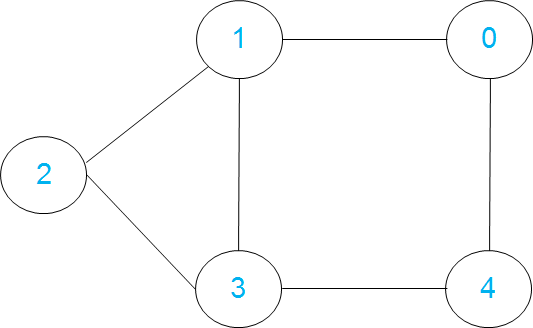

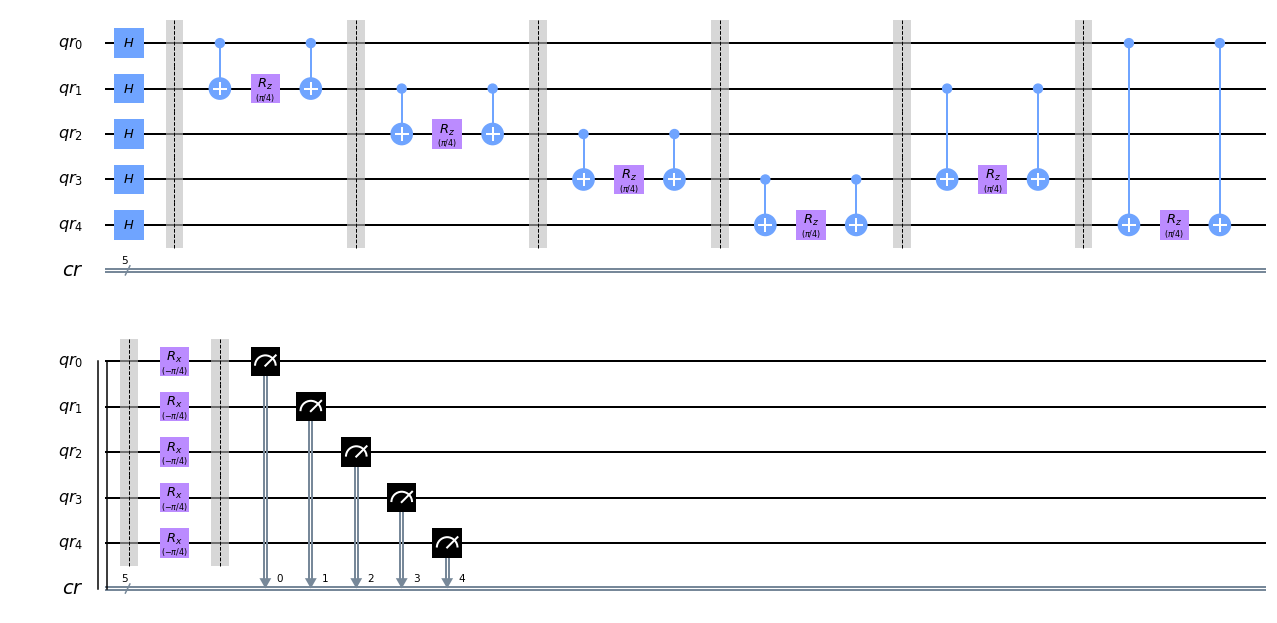

In [3]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')
qr = QuantumRegister(5, name="qr")
# create Quantum Register called "cr" with 4 qubits
cr = ClassicalRegister(5, name="cr")
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="QAOA_Algorithm")     

qc.h(qr) 
qc.barrier()

qc.cx(qr[0],qr[1])
qc.rz(pi/4, qr[1])
qc.cx(qr[0],qr[1])
qc.barrier()

qc.cx(qr[1],qr[2])
qc.rz(pi/4, qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()

qc.cx(qr[2],qr[3])
qc.rz(pi/4, qr[3])
qc.cx(qr[2],qr[3])
qc.barrier()

qc.cx(qr[3],qr[4])
qc.rz(pi/4, qr[4])
qc.cx(qr[3],qr[4])
qc.barrier()

qc.cx(qr[1],qr[3])
qc.rz(pi/4, qr[3])
qc.cx(qr[1],qr[3])
qc.barrier()

qc.cx(qr[0],qr[4])
qc.rz(pi/4, qr[4])
qc.cx(qr[0],qr[4])
qc.barrier()

qc.rx(-pi/4, qr)
qc.barrier()

# To measure the whole quantum register
qc.measure(qr, cr)
circuit_drawer(qc, output='mpl')



{'11111': 38, '11100': 243, '01111': 104, '10001': 15, '01001': 824, '00010': 73, '00101': 319, '00110': 96, '10101': 588, '10010': 880, '00100': 41, '00001': 108, '10000': 103, '01000': 56, '11110': 109, '11000': 229, '00011': 212, '10100': 345, '11001': 101, '00111': 254, '10011': 79, '11011': 52, '10110': 794, '01010': 559, '10111': 57, '11010': 347, '01100': 102, '01101': 820, '00000': 42, '01011': 322, '01110': 25, '11101': 63}


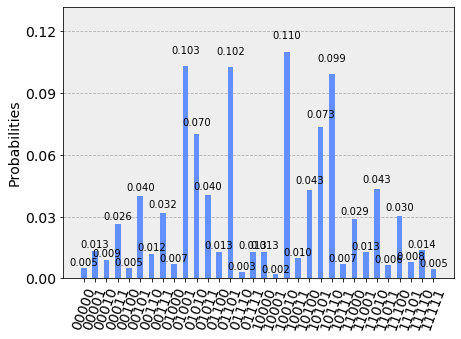

In [4]:
job = execute(qc, backend=backend, shots=8000,)
result = job.result()

    
print(result.get_counts(qc))
plot_histogram(result.get_counts())

In [5]:
import operator
temp = result.get_counts(qc)
sorted_result = sorted(temp.items(), key=operator.itemgetter(1))

In [23]:
sorted_key = sorted(temp.keys(), key=operator.itemgetter(1))

In [24]:
sorted_key

['10001',
 '00010',
 '00101',
 '00110',
 '10101',
 '10010',
 '00100',
 '00001',
 '10000',
 '00011',
 '10100',
 '00111',
 '10011',
 '10110',
 '10111',
 '00000',
 '11111',
 '11100',
 '01111',
 '01001',
 '01000',
 '11110',
 '11000',
 '11001',
 '11011',
 '01010',
 '11010',
 '01100',
 '01101',
 '01011',
 '01110',
 '11101']

In [18]:
sorted_result

[('10001', 15),
 ('01110', 25),
 ('11111', 38),
 ('00100', 41),
 ('00000', 42),
 ('11011', 52),
 ('01000', 56),
 ('10111', 57),
 ('11101', 63),
 ('00010', 73),
 ('10011', 79),
 ('00110', 96),
 ('11001', 101),
 ('01100', 102),
 ('10000', 103),
 ('01111', 104),
 ('00001', 108),
 ('11110', 109),
 ('00011', 212),
 ('11000', 229),
 ('11100', 243),
 ('00111', 254),
 ('00101', 319),
 ('01011', 322),
 ('10100', 345),
 ('11010', 347),
 ('01010', 559),
 ('10101', 588),
 ('10110', 794),
 ('01101', 820),
 ('01001', 824),
 ('10010', 880)]